In [2]:
#import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


(86, 300)
['add', 'addmod', 'address', 'addressTy', 'and', 'balance', 'basefee', 'blockhash', 'booleanTy', 'break', 'byte', 'call', 'calldatacopy', 'calldataload', 'calldatasize', 'caller', 'callvalue', 'chainid', 'codecopy', 'coinbase', 'constant', 'continue', 'create', 'create2', 'delegatecall', 'div', 'eq', 'exp', 'extcodecopy', 'extcodehash', 'extcodesize', 'forloop', 'function', 'functioncall', 'gas', 'gaslimit', 'gasprice', 'gt', 'if', 'invalid', 'iszero', 'keccak256', 'leave', 'log0', 'log1', 'log2', 'log3', 'log4', 'lt', 'mload', 'mod', 'mstore', 'mstore8', 'mul', 'mulmod', 'not', 'number', 'numberTy', 'or', 'origin', 'pop', 'prevrandao', 'return', 'returndatacopy', 'returndatasize', 'revert', 'sar', 'sdiv', 'selfbalance', 'selfdestruct', 'sgt', 'shl', 'shr', 'signextend', 'sload', 'slt', 'smod', 'sstore', 'staticcall', 'stop', 'switch', 'timestamp', 'unknownTy', 'variable', 'voidTy', 'xor']
[[-0.06853931  0.10377719  0.04445687 ... -0.10602812  0.02631327
   0.08278794]
 [ 0.0

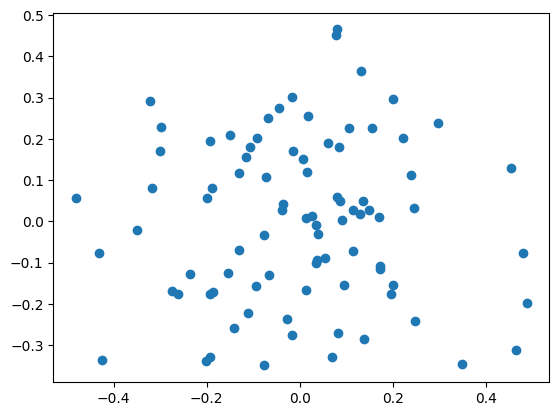

In [3]:
embeddings_file = 'preprocessed/seedEmbedding_2000E_300D_256batches4.0margin.txt'

with open(embeddings_file, 'r') as f:
    embeddings_raw = f.readlines()

terms = []
embeddings = []
for embedding in embeddings_raw:
    term, embedding = embedding.strip().split(':', 1)
    terms.append(term)
    embeddings.append([float(x) for x in embedding[:-1].split(' ')])

embeddings = np.array(embeddings, dtype=np.float32)

print(embeddings.shape)
print(terms)
print(embeddings)

pca = PCA(n_components=2, svd_solver='full')
embeddings_pca = pca.fit_transform(embeddings)

print(embeddings_pca.shape)
print(embeddings_pca)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots()  
ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1])
for i, term in enumerate(terms):
    #ax.annotate(term, (embeddings_pca[i, 0], embeddings_pca[i, 1]))
    pass
plt.show()


In [8]:
types_terms = ["booleanTy", "numberTy", "addressTy", "voidTy"]
types_with_unknown_terms = ["booleanTy", "unknownTy", "numberTy", "addressTy", "voidTy"]
logical_terms = ["and", "or", "xor", "not", "eq", "gt", "lt"]
arithmetic_terms = ["add", "mul", "div", "sdiv"]
call_terms = ["selfdestruct", "staticcall", "call", "delegatecall", "staticcall", "call", "delegatecall"]
argument_terms = ["variable", "constant", "function"]
memory_op_terms = ["sload", "mload", "sstore", "mstore"]

def get_indexes(terms, subterms):
    return [terms.index(t) for t in subterms]

types_indexes = get_indexes(terms, types_terms)
types_with_unknown_indexes = get_indexes(terms, types_with_unknown_terms)
logical_indexes = get_indexes(terms, logical_terms)
arithmetic_indexes = get_indexes(terms, arithmetic_terms)
call_indexes = get_indexes(terms, call_terms)
argument_indexes = get_indexes(terms, argument_terms)
memory_op_indexes = get_indexes(terms, memory_op_terms)

print(types_indexes)
print(logical_indexes)
print(arithmetic_indexes)
print(call_indexes)
print(argument_indexes)
print(memory_op_indexes)

[8, 57, 3, 84]
[4, 58, 85, 55, 26, 37, 48]
[0, 53, 25, 67]
[69, 78, 11, 24, 78, 11, 24]
[83, 20, 32]
[74, 49, 77, 51]


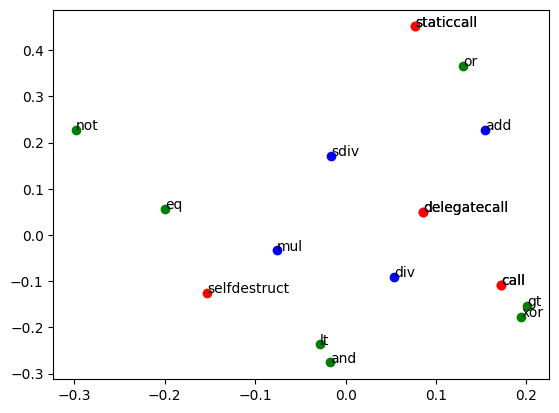

In [14]:
# plot arithmetic and types
fig, ax = plt.subplots()

ax.scatter(embeddings_pca[arithmetic_indexes, 0], embeddings_pca[arithmetic_indexes, 1], color='blue')
for i in arithmetic_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[logical_indexes, 0], embeddings_pca[logical_indexes, 1], color='green')
for i in logical_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[call_indexes, 0], embeddings_pca[call_indexes, 1], color='red')
for i in call_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()


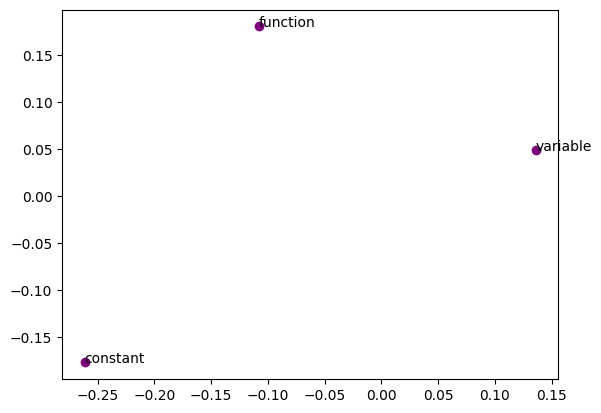

In [16]:
# plot call operations and arguments
fig, ax = plt.subplots()

# ax.scatter(embeddings_pca[call_indexes, 0], embeddings_pca[call_indexes, 1], color='green')
# for i in call_indexes:
#     ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[argument_indexes, 0], embeddings_pca[argument_indexes, 1], color='purple')
for i in argument_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()


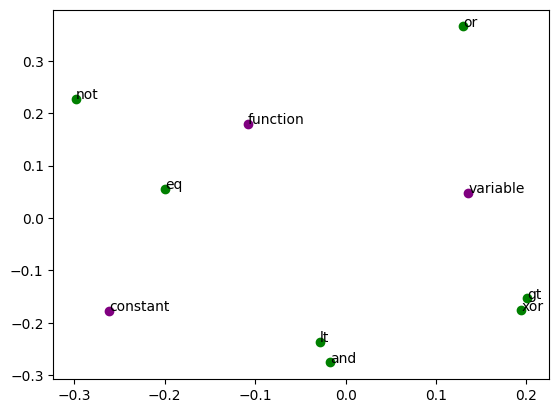

In [13]:
fig, ax = plt.subplots()

ax.scatter(embeddings_pca[logical_indexes, 0], embeddings_pca[logical_indexes, 1], color='green')
for i in logical_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[argument_indexes, 0], embeddings_pca[argument_indexes, 1], color='purple')
for i in argument_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()

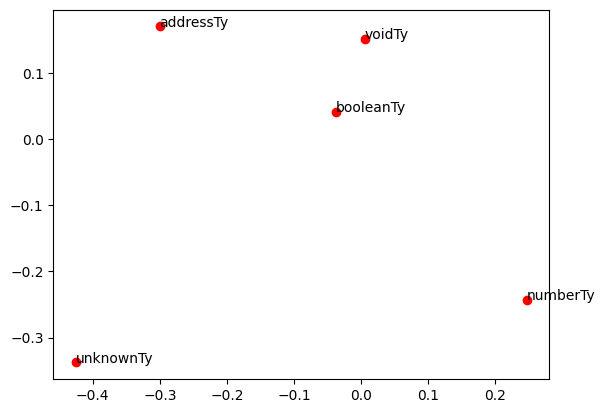

In [6]:
# plot arithmetic and types
fig, ax = plt.subplots()

ax.scatter(embeddings_pca[types_with_unknown_indexes, 0], embeddings_pca[types_with_unknown_indexes, 1], color='red')
for i in types_with_unknown_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()

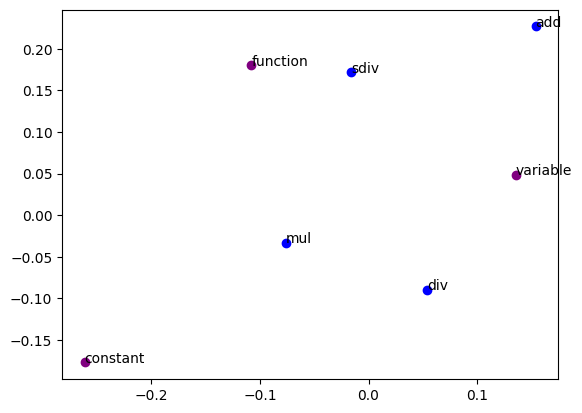

In [9]:
fig, ax = plt.subplots()

# ax.scatter(embeddings_pca[call_indexes, 0], embeddings_pca[call_indexes, 1], color='green')
# for i in call_indexes:
#     ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[arithmetic_indexes, 0], embeddings_pca[arithmetic_indexes, 1], color='blue')
for i in arithmetic_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))
    
ax.scatter(embeddings_pca[argument_indexes, 0], embeddings_pca[argument_indexes, 1], color='purple')
for i in argument_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()

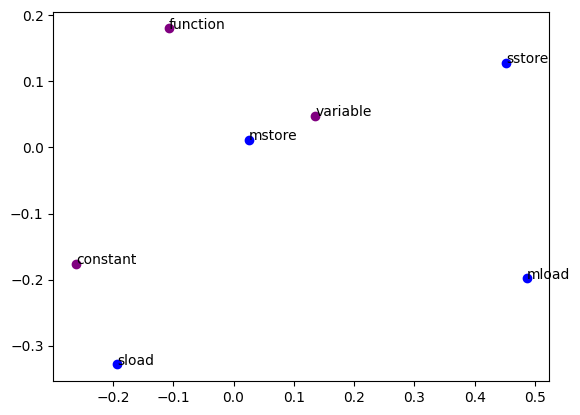

In [15]:
fig, ax = plt.subplots()

# ax.scatter(embeddings_pca[call_indexes, 0], embeddings_pca[call_indexes, 1], color='green')
# for i in call_indexes:
#     ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

ax.scatter(embeddings_pca[memory_op_indexes, 0], embeddings_pca[memory_op_indexes, 1], color='blue')
for i in memory_op_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))
    
ax.scatter(embeddings_pca[argument_indexes, 0], embeddings_pca[argument_indexes, 1], color='purple')
for i in argument_indexes:
    ax.annotate(terms[i], (embeddings_pca[i, 0], embeddings_pca[i, 1]))

plt.show()